In [31]:
from os import chdir as cd
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Hall_MOTCHI/'

folders = ['Hall_CHI','Hall_MOT']

# Count the mother's tokens (CDS)
pro = []
work = []

cd(pathin + folders[1])
for file in glob.glob('*.txt'):
    with open(file,'r') as f:
        text = f.read()
        if 'Pro' in file:
            pro.append(text)
        if 'Work' in file:
            work.append(text)


tokens_pro_CDS = []
tokens_work_CDS = []

for transcript in pro:
    words = transcript.split()
    tokens_pro_CDS.append(len(words))
for transcript in work:
    words = transcript.split()
    tokens_work_CDS.append(len(words))

    
tokens_pro_CDS = [n for n in tokens_pro_CDS if n != 0]
tokens_work_CDS = [n for n in tokens_work_CDS if n != 0]


# Count the children's tokens (CS)
pro = []
work = []

cd(pathin + folders[0])
for file in glob.glob('*.txt'):
    with open(file,'r') as f:
        text = f.read()
        if 'Pro' in file:
            pro.append(text)
        if 'Work' in file:
            work.append(text)


tokens_pro_CS = []
tokens_work_CS = []

for transcript in pro:
    words = transcript.split()
    tokens_pro_CS.append(len(words))
for transcript in work:
    words = transcript.split()
    tokens_work_CS.append(len(words))

    
tokens_pro_CS = [n for n in tokens_pro_CS if n != 0]
tokens_work_CS = [n for n in tokens_work_CS if n != 0]



# Make a dataframe for CDS
                                             
pro_CDS = ["WhiteCollar"] * len(tokens_pro_CDS)
work_CDS = ["BlueCollar"] * len(tokens_work_CDS)
#adult = ["Adult"] * len(pro_CDS + work_CDS)
SES_CDS = pro_CDS + work_CDS
Tokens_CDS = tokens_pro_CDS + tokens_work_CDS

# Make a dataframe for CSS
pro_CS = ["WhiteCollar"] * len(tokens_pro_CS)
work_CS = ["BlueCollar"] * len(tokens_work_CS)
SES_CS = pro_CS + work_CS
#child = ["Child"] * len(pro_CS + work_CS)
SES_CS = pro_CS + work_CS
Tokens_CS = tokens_pro_CS + tokens_work_CS

#speaker = adult + child
#SES = pro_CDS + work_CDS + pro_CS + work_CS
#Tokens = tokens_pro_CDS + tokens_work_CDS + tokens_pro_CS + tokens_work_CS
                                              
                                              
df_CDS = pd.DataFrame(
    {'SES': SES_CDS,
     'Tokens': Tokens_CDS
    })

df_CS = pd.DataFrame(
    {'SES': SES_CS,
     'Tokens': Tokens_CS
    })

print('CDS')
print(df_CDS.head())
print('\n')
print(df_CS.head())

CDS
           SES  Tokens
0  WhiteCollar    4846
1  WhiteCollar   17537
2  WhiteCollar    7839
3  WhiteCollar    4113
4  WhiteCollar    1332


           SES  Tokens
0  WhiteCollar   10483
1  WhiteCollar   10184
2  WhiteCollar    9666
3  WhiteCollar    5408
4  WhiteCollar    7045


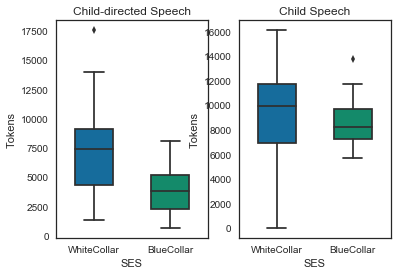

In [37]:
# make a single plot with multiple boxplots (facetgrid) with Seaborn

sns.set_style('white')

# Define a figure with two subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(1, 2)

# Describe the first plot and assign it to ax1
p1 = sns.boxplot(y = 'Tokens', x = 'SES',
                ax = ax1,
                data = df_CDS,
                width=0.5,
                palette="colorblind")

# Describe the second plot and assign it to ax2
p2 = sns.boxplot(y = 'Tokens', x = 'SES',
                ax = ax2,
                data = df_CS,
                width=0.5,
                palette="colorblind")

# Add titles to the two subplots
ax1.set_title('Child-directed Speech')
ax2.set_title('Child Speech')